In [1]:
import qube
%qubed

from sklearn.base import BaseEstimator
import seaborn as sns

%load_ext autoreload
%autoreload 2


              .+-------+ 
            .' :     .'|   QUBE | Quantitative Backtesting Environment
           +-------+'  |  
           |   : * |   |   (c) 2022,  ver. 0.3.24
           |  ,+---|---+ 
           |.'     | .'    
           +-------+'    


In [2]:
data = load_data('BINANCEF:BTCUSDT', 'BINANCEF:ETHUSDT', timeframe='15Min', dbtype='csv')

# How to use signals generators

In [3]:
test_data = data.ohlc('4h')

In [4]:
@signal_generator
class TestRandomGenerator(BaseEstimator):
    
    def __init__(self, param1=1):
        self.param1 = param1
        
    def fit(self, x, y, **kwargs):
        print(' >>> (fit) symbols:', self.market_info_.symbols)
        return self
    
    def predict(self, x):
        print(' >>> (predict) symbols:', self.market_info_.symbols)
        return pd.Series(np.random.randint(-5, 5, len(x)), x.index)
    
    def tracker(self):
        return FixedRiskTrader(100, take=10, stop=5, in_percentage=True, accurate_stops=True, reset_risks_on_repeated_signals=False)

backtest:   0%|          | 0.00/100 [00:00<?, ? signals/s]

2023-12-01 12:41:35,822 - qube.Simulator - INFO - Fitting estimator SingleInstrumentComposer for 2023-01-01 : [end] ... 


 >>> (fit) symbols: BTCUSDT
 >>> (fit) symbols: ETHUSDT
 >>> (predict) symbols: BTCUSDT
 >>> (predict) symbols: ETHUSDT
 0: /Monkey Trader  : Sharpe: 1.63 | Sortino: 3.98 | CAGR: 187.14 | DD: $66.05 (40.77%) | Gain: $10.01 | Execs: 348 | Comm: 51.50[inc][OK]


,Name,sharpe,sortino,cagr,dd,dd_pct,gain,number_executions,comm
0,/Monkey Trader,1.632631,3.981539,187.139172,66.047596,40.766146,10.006052,348,51.5


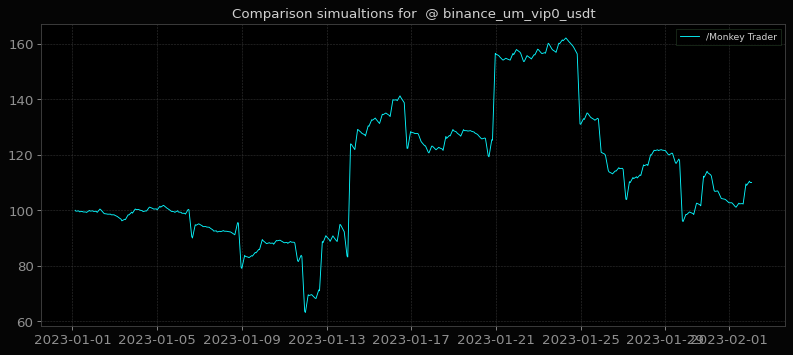

In [5]:
sim = simulation(
    {
        'Monkey Trader': 
             TestRandomGenerator(param1=2)
    },
    test_data, 'binance_um_vip0_usdt',
    start='2023-01-01', stop='2023-02-01'
)
sim.report(100)

In [108]:
print(sim.results[0].trackers_stat)

{'BTCUSDT': {'takes': 0, 'stops': 0, 'average_time_to_take': nan, 'average_time_to_stop': nan}, 'ETHUSDT': {'takes': 1, 'stops': 1, 'average_time_to_take': Timedelta('0 days 02:24:01'), 'average_time_to_stop': Timedelta('0 days 05:36:01')}}


## How successful monkey trader can be ?

In [151]:
sim2 = simulation(
    variate(TestRandomGenerator, param1=list(range(10))),
    test_data, 'binance_um_vip0_usdt',
    start='2023-01-01', stop='2023-02-01'
)

backtest:   0%|          | 0.00/1000.0Y [00:00<?, ? signals/s]

2023-12-01 12:03:45,110 - qube.Simulator - INFO - Fitting estimator SingleInstrumentComposer for 2023-01-01 : [end] ... 
2023-12-01 12:03:45,268 - qube.Simulator - INFO - Fitting estimator SingleInstrumentComposer for 2023-01-01 : [end] ... 


 >>> (fit) symbols: BTCUSDT
 >>> (fit) symbols: ETHUSDT
 >>> (predict) symbols: BTCUSDT
 >>> (predict) symbols: ETHUSDT
 >>> (fit) symbols: BTCUSDT
 >>> (fit) symbols: ETHUSDT
 >>> (predict) symbols: BTCUSDT
 >>> (predict) symbols: ETHUSDT


2023-12-01 12:03:45,385 - qube.Simulator - INFO - Fitting estimator SingleInstrumentComposer for 2023-01-01 : [end] ... 
2023-12-01 12:03:45,500 - qube.Simulator - INFO - Fitting estimator SingleInstrumentComposer for 2023-01-01 : [end] ... 


 >>> (fit) symbols: BTCUSDT
 >>> (fit) symbols: ETHUSDT
 >>> (predict) symbols: BTCUSDT
 >>> (predict) symbols: ETHUSDT
 >>> (fit) symbols: BTCUSDT
 >>> (fit) symbols: ETHUSDT
 >>> (predict) symbols: BTCUSDT
 >>> (predict) symbols: ETHUSDT


2023-12-01 12:03:45,615 - qube.Simulator - INFO - Fitting estimator SingleInstrumentComposer for 2023-01-01 : [end] ... 
2023-12-01 12:03:45,731 - qube.Simulator - INFO - Fitting estimator SingleInstrumentComposer for 2023-01-01 : [end] ... 


 >>> (fit) symbols: BTCUSDT
 >>> (fit) symbols: ETHUSDT
 >>> (predict) symbols: BTCUSDT
 >>> (predict) symbols: ETHUSDT
 >>> (fit) symbols: BTCUSDT
 >>> (fit) symbols: ETHUSDT
 >>> (predict) symbols: BTCUSDT
 >>> (predict) symbols: ETHUSDT


2023-12-01 12:03:45,846 - qube.Simulator - INFO - Fitting estimator SingleInstrumentComposer for 2023-01-01 : [end] ... 
2023-12-01 12:03:45,961 - qube.Simulator - INFO - Fitting estimator SingleInstrumentComposer for 2023-01-01 : [end] ... 


 >>> (fit) symbols: BTCUSDT
 >>> (fit) symbols: ETHUSDT
 >>> (predict) symbols: BTCUSDT
 >>> (predict) symbols: ETHUSDT
 >>> (fit) symbols: BTCUSDT
 >>> (fit) symbols: ETHUSDT
 >>> (predict) symbols: BTCUSDT
 >>> (predict) symbols: ETHUSDT


2023-12-01 12:03:46,078 - qube.Simulator - INFO - Fitting estimator SingleInstrumentComposer for 2023-01-01 : [end] ... 
2023-12-01 12:03:46,191 - qube.Simulator - INFO - Fitting estimator SingleInstrumentComposer for 2023-01-01 : [end] ... 


 >>> (fit) symbols: BTCUSDT
 >>> (fit) symbols: ETHUSDT
 >>> (predict) symbols: BTCUSDT
 >>> (predict) symbols: ETHUSDT
 >>> (fit) symbols: BTCUSDT
 >>> (fit) symbols: ETHUSDT
 >>> (predict) symbols: BTCUSDT
 >>> (predict) symbols: ETHUSDT


 0: /TRG_(p1=0)  : Sharpe: 0.62 | Sortino: 1.06 | CAGR: -48.50 | DD: $41.83 (40.52%) | Gain: $-5.82 | Execs: 346 | Comm: 51.76[inc][OK]
 1: /TRG_(p1=1)  : Sharpe: -inf | Sortino: -18.25 | CAGR: -100.00 | DD: $67.33 (67.33%) | Gain: $-180.89 | Execs: 358 | Comm: 18.56[inc][OK]
 2: /TRG_(p1=2)  : Sharpe: -inf | Sortino: -13.90 | CAGR: -100.00 | DD: $84.71 (84.71%) | Gain: $-153.75 | Execs: 348 | Comm: 18.68[inc][OK]
 3: /TRG_(p1=3)  : Sharpe: -inf | Sortino: -6.64 | CAGR: -100.00 | DD: $74.71 (74.69%) | Gain: $-76.11 | Execs: 354 | Comm: 33.10[inc][OK]
 4: /TRG_(p1=4)  : Sharpe: 2.50 | Sortino: 6.89 | CAGR: 3698.45 | DD: $57.12 (56.99%) | Gain: $38.94 | Execs: 354 | Comm: 53.88[inc][OK]
 5: /TRG_(p1=5)  : Sharpe: -inf | Sortino: -7.54 | CAGR: -100.00 | DD: $87.28 (80.00%) | Gain: $-88.49 | Execs: 351 | Comm: 36.64[inc][OK]
 6: /TRG_(p1=6)  : Sharpe: -inf | Sortino: -9.94 | CAGR: -100.00 | DD: $72.35 (71.82%) | Gain: $-197.08 | Execs: 346 | Comm: 25.24[inc][OK]
 7: /TRG_(p1=7)  : Sharpe: 

,Name,sharpe,sortino,cagr,dd,dd_pct,gain,number_executions,comm
0,/TRG_(p1=0),0.615494,1.063428,-48.497811,41.832887,40.516113,-5.822776,346,51.76
1,/TRG_(p1=1),-inf,-18.249767,-100.000000,67.327062,67.327062,-180.887731,358,18.56
2,/TRG_(p1=2),-inf,-13.897046,-100.000000,84.712023,84.712023,-153.748305,348,18.68
3,/TRG_(p1=3),-inf,-6.635378,-100.000000,74.705821,74.689376,-76.113518,354,33.10
4,/TRG_(p1=4),2.497242,6.894684,3698.445711,57.123440,56.987953,38.935646,354,53.88
5,/TRG_(p1=5),-inf,-7.536952,-100.000000,87.277644,79.998609,-88.488654,351,36.64
6,/TRG_(p1=6),-inf,-9.944108,-100.000000,72.349592,71.822238,-197.075800,346,25.24
7,/TRG_(p1=7),-inf,-12.441034,-100.000000,70.621084,70.621084,-44.564633,354,19.96
8,/TRG_(p1=8),1.388654,3.514305,79.852884,50.810505,50.810505,5.450180,341,50.18
9,/TRG_(p1=9),-inf,-7.157643,-99.999996,81.815852,74.321392,-78.006148,350,42.32


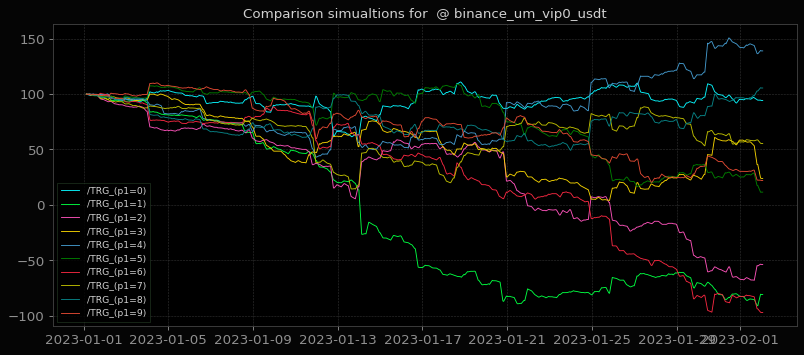

In [152]:
sim2.report(100)

# Super trend + RSI confirmation

In [6]:
from test_strategy import SuperRsi

In [7]:
ohlc = data['BTCUSDT'].ohlc('1h')

In [8]:
st = super_trend(ohlc, 6, 3, atr_smoother='kama')
rsi_i = rsi(ohlc.close, 3, 'sma')

Idea is to open long when RSI(3) crosses up lower threshold and price is above SuperTrend indicator.

Short is open when RSI(3) crosses uppert threshold down and price is below SuperTrend.

This may work good in trending markets.

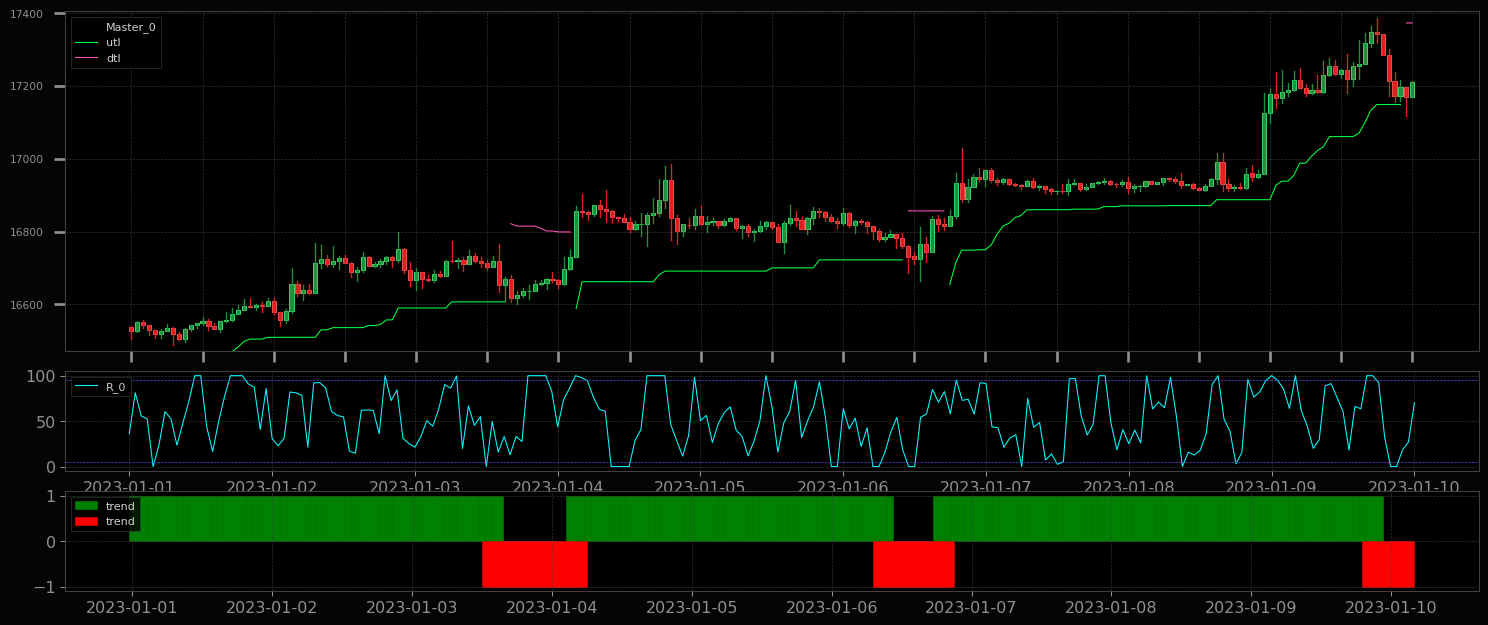

In [9]:
fig(19, 8)

LookingGlass([ohlc, st.utl, st.dtl], {
    'R': [rsi_i, '--', 95, '--', 5],
    'T':[
        'bars', 'g', st.trend[st.trend > 0],
        'bars', 'r', st.trend[st.trend < 0],
    ]
}, backend='mpl').look('2023-01-01', '2023-01-10')

Actual code is in test_strategy.py file. We apply simplest risk management - trade fixed amount position and use 10% as take and 5% as stop targets. So our risk reward ratio is 1:2 that's not bad at all.

Let's backtest this idea on 4H timeframe (close prices). 

In [10]:
s = simulation(
    {
        'Test0': SuperRsi(trend_period=6, trend_nstd=2, trend_smoother='kama', rsi_period=3, rsi_entry=2, take_pct=10, stop_pct=5)
    },  
    data.ohlc('4H'),  'binance_um_vip0_usdt', start='2022-01-01', 
)

backtest:   0%|          | 0.00/100 [00:00<?, ? signals/s]

2023-12-01 12:41:55,693 - qube.Simulator - INFO - Fitting estimator SingleInstrumentComposer for 2022-01-01 : [end] ... 


 0: /Test0  : Sharpe: 1.37 | Sortino: 2.71 | CAGR: 63.31 | DD: $389.84 (17.81%) | Gain: $1537.53 | Execs: 319 | Comm: 147.60[inc][OK]


,Name,sharpe,sortino,cagr,dd,dd_pct,gain,number_executions,comm
0,/Test0,1.365897,2.714607,63.30568,389.841197,17.805297,1537.526995,319,147.6


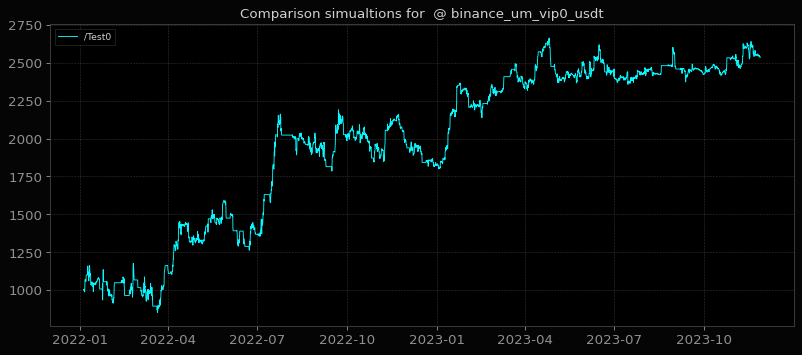

In [11]:
s.report(1000)


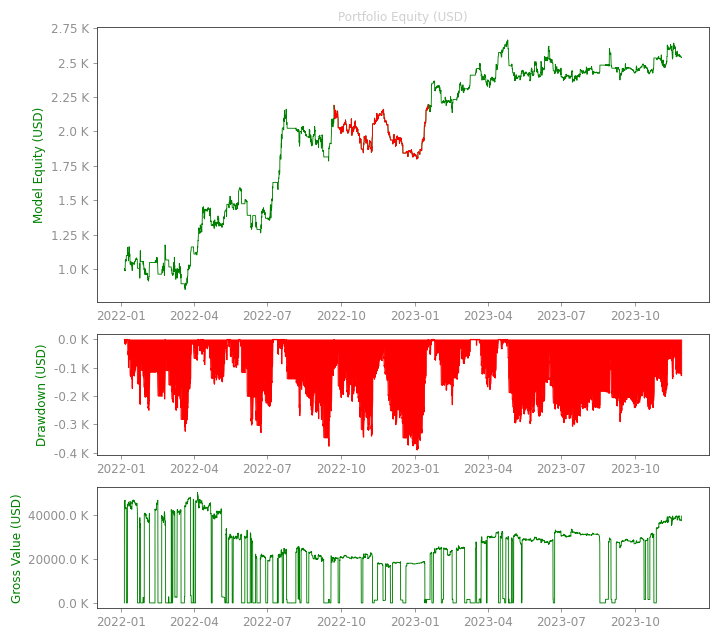

<Figure size 720x640 with 0 Axes>

In [12]:
tearsheet(s.results[0], 1000)

<hr/>
Let's check risk management statistics:
<hr/>

In [13]:
s.results[0].trackers_stat

{'BTCUSDT': {'takes': 16,
  'stops': 37,
  'average_time_to_take': Timedelta('4 days 23:51:01'),
  'average_time_to_stop': Timedelta('5 days 05:55:28.567567567')},
 'ETHUSDT': {'takes': 26,
  'stops': 44,
  'average_time_to_take': Timedelta('2 days 21:06:28.692307692'),
  'average_time_to_stop': Timedelta('3 days 12:18:33.727272727')}}

37 stops vs 16 takes on BTC and 44 vs 26 on ETH. 

<hr/>
More detailed statistics for each entry
<hr/>

In [14]:
stats_BTC = signals_statistics(s.results[0], 'BTCUSDT', data.ohlc('1H'))
stats_ETH = signals_statistics(s.results[0], 'ETHUSDT', data.ohlc('1H'))

In [15]:
stats_BTC

,direction,entry_time,quantity,entry_price,exit_time,exit_price,commissions,hold_time,signed_change,pnl,...,er_x,ampl_max,ampl_max_pct,ampl_time_max,er_max,ampl_min,ampl_min_pct,ampl_time_min,er_min,index
2022-01-04 19:59:59,-1.0,2022-01-04 19:59:59,-1000.0,46058.09,2022-01-07 06:24:00,41452.2810,0.6,2 days 10:24:01,-4605.8090,100.000000,...,0.368530,5158.09,0.111991,2 days 08:00:01,0.369652,1017.20,0.022085,0 days 14:00:01,-0.254168,0
2022-01-08 15:59:59,-1.0,2022-01-08 15:59:59,-1000.0,41600.72,2022-01-11 19:59:59,42938.5500,1.2,3 days 04:00:00,1337.8300,-32.158818,...,-0.097463,1990.72,0.047853,1 days 22:00:01,0.061785,1517.28,0.036472,3 days 01:00:01,-0.073979,1
2022-01-11 19:59:59,1.0,2022-01-11 19:59:59,1000.0,42938.55,2022-01-21 02:24:00,40481.1815,1.2,9 days 06:24:01,-2457.3685,-57.229890,...,-0.088076,1458.13,0.033959,1 days 18:00:01,0.272792,3928.55,0.091492,9 days 06:00:01,-0.088076,2
2022-01-23 15:59:59,-1.0,2022-01-23 15:59:59,-1000.0,35265.33,2022-01-24 22:24:00,37028.5965,0.8,1 days 06:24:01,1763.2665,-50.000000,...,-0.096407,2411.50,0.068382,0 days 21:00:01,0.268379,2262.67,0.064161,1 days 04:00:01,-0.179208,3
2022-01-29 11:59:59,-1.0,2022-01-29 11:59:59,-1000.0,37723.57,2022-01-30 23:59:59,37870.0100,1.2,1 days 12:00:00,146.4400,-3.881923,...,-0.008325,471.57,0.012501,0 days 03:00:01,0.318303,1027.37,0.027234,0 days 09:00:01,-0.294427,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-18 23:59:59,1.0,2023-10-18 23:59:59,1000.0,28307.10,2023-10-23 22:24:00,32885.4900,0.6,4 days 22:24:01,4578.3900,161.739987,...,0.409101,7674.80,0.271126,4 days 22:00:01,0.409101,231.10,0.008164,0 days 01:00:01,-1.000000,83
2023-10-26 23:59:59,1.0,2023-10-26 23:59:59,1000.0,34154.00,2023-11-04 11:59:59,34706.2000,1.2,8 days 12:00:00,552.2000,16.167945,...,0.037121,1845.90,0.054046,6 days 02:00:01,0.126792,804.00,0.023540,0 days 17:00:01,-0.194472,84
2023-11-04 11:59:59,-1.0,2023-11-04 11:59:59,-1000.0,34706.20,2023-11-07 07:59:59,34947.3000,1.6,2 days 20:00:00,241.1000,-6.946886,...,-0.034904,350.20,0.010090,1 days 09:00:01,0.033626,749.00,0.021581,1 days 11:00:01,-0.084424,85
2023-11-07 07:59:59,1.0,2023-11-07 07:59:59,1000.0,34947.30,2023-11-09 19:59:59,36399.5000,1.6,2 days 12:00:00,1452.2000,41.553997,...,0.159563,3552.60,0.101656,2 days 06:00:01,0.419326,427.00,0.012218,0 days 04:00:01,-0.450772,86


In [188]:
stats_ETH

,direction,entry_time,quantity,entry_price,exit_time,exit_price,commissions,hold_time,signed_change,pnl,...,er_x,ampl_max,ampl_max_pct,ampl_time_max,er_max,ampl_min,ampl_min_pct,ampl_time_min,er_min,index
2022-01-08 15:59:59,-1.0,2022-01-08 15:59:59,-1000.0,3159.67,2022-01-12 10:24:00,3264.3555,0.8,3 days 18:24:01,104.6855,-33.131783,...,-0.071543,234.89,0.074340,1 days 22:00:01,0.124976,117.33,0.037134,3 days 17:00:01,-0.079854,0
2022-01-14 03:59:59,1.0,2022-01-14 03:59:59,1000.0,3265.68,2022-01-15 03:59:59,3306.1900,1.2,1 days 00:00:00,40.5100,12.404767,...,0.092009,76.95,0.023563,0 days 17:00:01,0.183577,84.48,0.025869,0 days 08:00:01,-0.384341,1
2022-01-15 03:59:59,-1.0,2022-01-15 03:59:59,-1000.0,3306.19,2022-01-20 14:24:00,3236.9505,1.2,5 days 10:24:01,-69.2395,20.942384,...,0.046080,261.19,0.079000,4 days 04:00:01,0.178154,88.43,0.026747,1 days 12:00:01,-0.156356,2
2022-01-23 15:59:59,-1.0,2022-01-23 15:59:59,-1000.0,2431.04,2022-01-24 13:36:00,2187.9360,0.6,0 days 21:36:01,-243.1040,100.000000,...,0.359823,262.10,0.107814,0 days 20:00:01,0.353054,117.04,0.048144,0 days 07:00:01,-0.509207,3
2022-01-27 19:59:59,-1.0,2022-01-27 19:59:59,-1000.0,2393.48,2022-01-28 22:24:00,2513.1540,0.8,1 days 02:24:01,119.6740,-50.000000,...,-0.283413,79.15,0.033069,0 days 01:00:01,-1.000000,155.52,0.064977,1 days 01:00:01,-0.321941,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01 19:59:59,1.0,2023-11-01 19:59:59,1000.0,1836.87,2023-11-04 07:59:59,1833.7700,1.6,2 days 12:00:00,-3.1000,-1.687653,...,-0.080125,39.39,0.021444,0 days 07:00:01,0.054622,61.51,0.033486,1 days 05:00:01,-0.429992,101
2023-11-04 07:59:59,-1.0,2023-11-04 07:59:59,-1000.0,1833.77,2023-11-08 11:59:59,1881.1000,1.6,4 days 04:00:00,47.3300,-25.810216,...,-0.068352,5.85,0.003190,0 days 07:00:01,0.636218,83.03,0.045278,2 days 06:00:01,-0.220458,102
2023-11-08 11:59:59,1.0,2023-11-08 11:59:59,1000.0,1881.10,2023-11-09 22:24:00,2069.2100,1.0,1 days 10:24:01,188.1100,100.000000,...,0.518949,238.51,0.126793,1 days 10:00:01,0.518949,1.00,0.000532,0 days 03:00:01,0.437238,103
2023-11-11 07:59:59,1.0,2023-11-11 07:59:59,1000.0,2056.58,2023-11-14 18:24:00,1946.8920,0.8,3 days 10:24:01,-109.6880,-53.335149,...,-0.121558,63.42,0.030838,2 days 08:00:01,0.091338,136.58,0.066411,3 days 10:00:01,-0.121558,104


Distribution of PnLs (USDT) for each instrument

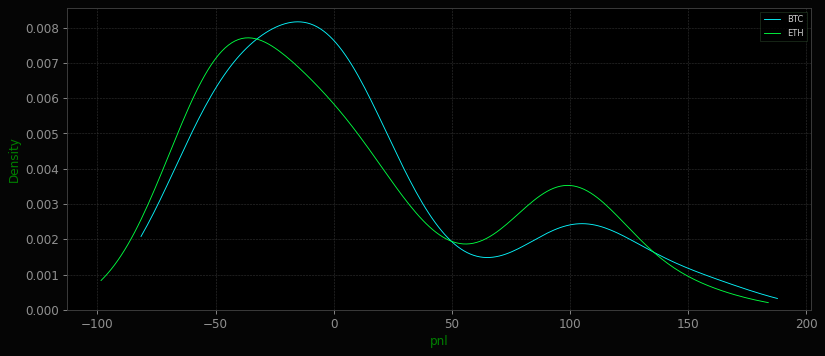

In [189]:
sns.kdeplot(stats_BTC.pnl, cut=1, label='BTC')
sns.kdeplot(stats_ETH.pnl, cut=1, label='ETH'); plt.legend();

# More flexible risk management and capital sizing

Let's make our risk fixed per trade and limit loss to 2% of total capital.

Also we can use current volatility for making take/stop exits.

In [37]:
%load_ext autoreload
%autoreload 2
from test_strategy import SuperRsiVol

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
s1 = simulation(
    {
        'Test1': 
            SuperRsiVol(trend_period=6, trend_nstd=2, trend_smoother='kama', rsi_period=3, rsi_entry=2, 
                        capital=1000,           # 1000 USDT capital per instrument
                        capital_in_risk_pct=2,  # we risk only 2% of capital per trade
                        atr_timeframe='4h',     # as volatility proxy we use ATR(24) on 4H timeframe
                        atr_period=24,           
                        take_atr=5,             # take is 5 x ATR
                        stop_atr=4              # stop is 4 x ATR
                       )
    },  
    data.ohlc('4H'),  'binance_um_vip0_usdt', start='2022-01-01', 
)

backtest:   0%|          | 0.00/100 [00:00<?, ? signals/s]

2023-12-01 12:55:37,930 - qube.Simulator - INFO - Fitting estimator SingleInstrumentComposer for 2022-01-01 : [end] ... 


 0: /Test1  : Sharpe: 1.26 | Sortino: 2.43 | CAGR: 23.49 | DD: $151.56 (9.60%) | Gain: $492.78 | Execs: 254 | Comm: 48.38[inc][OK]


,Name,sharpe,sortino,cagr,dd,dd_pct,gain,number_executions,comm
0,/Test1,1.259194,2.433166,23.493168,151.561996,9.599602,492.780767,254,48.3792


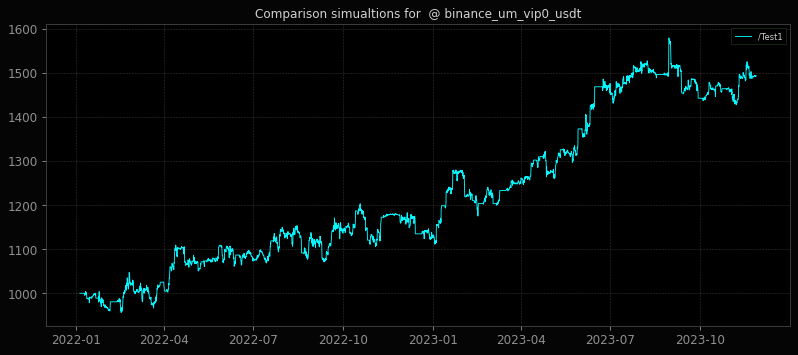

In [64]:
s1.report(1000)

Let's compare fixed trader and volatility adjusted

 0: /Test0  : Sharpe: 1.37 | Sortino: 2.71 | CAGR: 63.31 | DD: $389.84 (17.81%) | Gain: $1537.53 | Execs: 319 | Comm: 147.60[inc][OK]
 1: /Test1  : Sharpe: 1.26 | Sortino: 2.43 | CAGR: 23.49 | DD: $151.56 (9.60%) | Gain: $492.78 | Execs: 254 | Comm: 48.38[inc][OK]


,Name,sharpe,sortino,cagr,dd,dd_pct,gain,number_executions,comm
0,/Test0,1.365897,2.714607,63.305680,389.841197,17.805297,1537.526995,319,147.6000
1,/Test1,1.259194,2.433166,23.493168,151.561996,9.599602,492.780767,254,48.3792


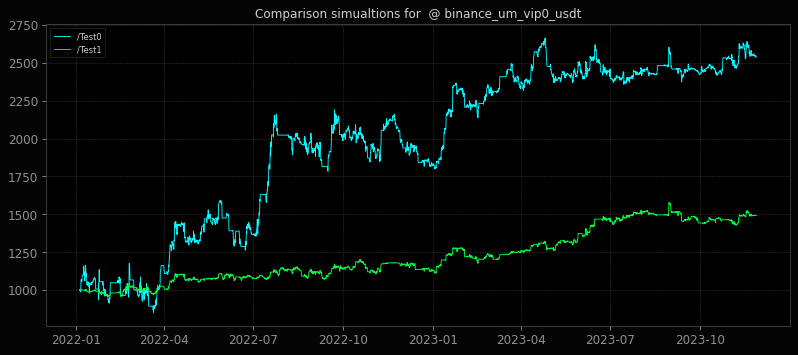

In [65]:
(s + s1).report(1000)